In [1]:
import numpy as np
import random
import string
import captcha
import os

#os.environ['KMP_DUPLICATE_LIB_OK']='True'
#os.environ['CUDA_VISIBLE_DEVICES'] = "0"

from captcha.image import ImageCaptcha 
from captchacracker.model import CaptchaCracker

In [3]:
## characters='0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
characters = string.digits + string.ascii_uppercase
print("corpus : {}".format(characters))

## set up size of generated image : width == 128, hright == 64, length == 4
width, height, n_len, n_class = 128, 64, 4, len(characters)

## random generate captcha
generator = ImageCaptcha(width=width, height=height)

## random select character from corpus, lenght == n_len
random_str = ''.join([random.choice(characters) for j in range(n_len)])
img = generator.generate_image(random_str)

corpus : 0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ


In [7]:
model = CaptchaCracker(weight_path='weight_new/crnn_ctc_model.pth', backbone='normal')

INFO:model:device type : cuda
INFO:model:ready for inference


Loading weights into state dict...
Finished!


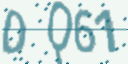

In [8]:
random_str = ''.join([random.choice(characters) for j in range(n_len)])
img = generator.generate_image(random_str)
img

In [9]:
output = model.process(img)

/home/jeff_yang/CRNN/model.py:157: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor(img).type(torch.LongTensor).to(self.device)


In [10]:
output

'0Q61'